K-Means Clustering is an Unsupervised machine learning algorithm that helps group data points into clusters based on their inherent similarity.
K-Means is used when we have data that is not labeled and the goal is to uncover hidden patterns or structures. For eg: An online store can use K-Means to segment customers into groups like "Budget Shoppers, Frequent Buyers, and Big Spenders" based on their purchase history.

Well! In this project! (Customer Segmentation) using K-Means Applied clustering on Mall_Customers dataset to segment customers based on purchasing behavior.

Defining of the Problem:
Goal: Segment customers into different groups based on their purchasing behavior so that marketing strategies can be tailored to each group like:
Who are the most valuable customers?
Who are low-spending but frequent customers?
Which groups respond differently to promotions?



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv(r"C:\Users\alexq\Desktop\-Kuki-Qyps-\practis\my_ds_env\DATASETS\Mall_Customers.csv")
cust_head = data.head()
print(cust_head)

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
cust_info = data.info()
print(cust_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Data Preprocessing:
Since data has no null values!! and it has columns:
CustomerID → Just an identifier (not useful for clustering) →I'll drop it.

Gender → Categorical (object type) → needs encoding.
Age → Numerical → can be used directly.
Annual Income (k$) → Numerical → can be used.
Spending Score (1-100) → Numerical → can be used.

What i'll do in preprocessing:
Drop CustomerID (not required for clustering).
Convert Gender into numeric using Label Encoding or One-Hot Encoding.
For K-Means, numeric values are required.
Checking for missing values (already done isnull().sum() its looks clean).
Prepare the feature matrix (X) for clustering.

In [8]:
# Droping CustomerID since it not needed
data = data.drop("CustomerID", axis=1)

# Encode Gender (Male=0, Female=1)
lab_en = LabelEncoder()
data['Gender'] = lab_en.fit_transform(data['Gender'])

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


## Exploratory Data Analysis (EDA) 
To understand patterns in the data before clustering Key thing to check like:

1.Univariate Analysis → Age distribution, Income distribution, Spending Score distribution.

2.Bivariate Analysis → Relationships like Income vs Spending Score, Age vs Spending Score.

3.Gender distribution.

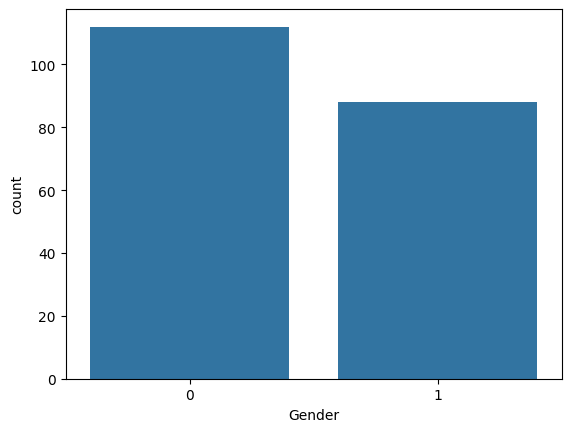

In [9]:
# Gender count
sns.countplot(x="Gender", data=data)
plt.show()

From countplot the Gender distribution after encoding: 0=male, 1=female
so the bar chart: Males are slightly more than females in dataset.
the distribution looks fairly balanced (not heavily skewed)

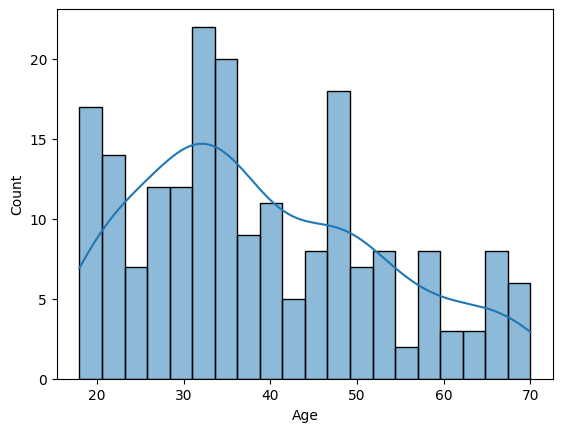

In [10]:
# Age distribution
sns.histplot(data['Age'], bins=20, kde=True)
plt.show()

From histplot! The Age distribution what it tells is that:
Most customers are between 25-40 years old.
There's a peak around the 30-35 range (young working professionals)
A smaller number of customers are older than 55.
This Distribution is slightly right-skewed(more young/mid-age than elderly)
It is usefull because:
Younger customers might have higher spending scores.
Older customers may have lower spending scores

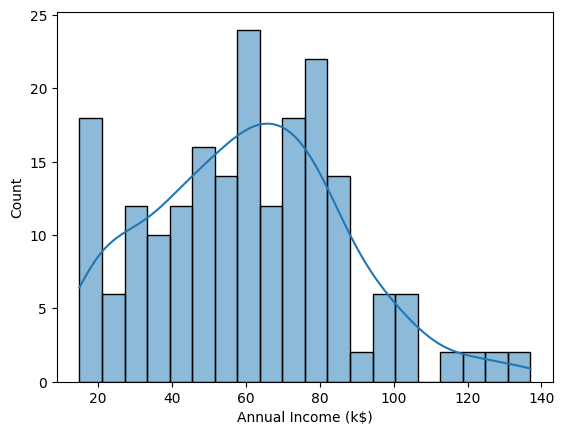

In [11]:
# Income distribution
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.show()

The about histplot show Annual Income distribution:
Well! Most customers earn between 40k-80k. There are fewer customers in the 100k+ range. The distribution looks a bit right-skewed
(a few high-income customers)

This makes sense in real-world retail data. The middle-income group forms the majority. High-income customers are fewer but might spend differently(luxury segment)

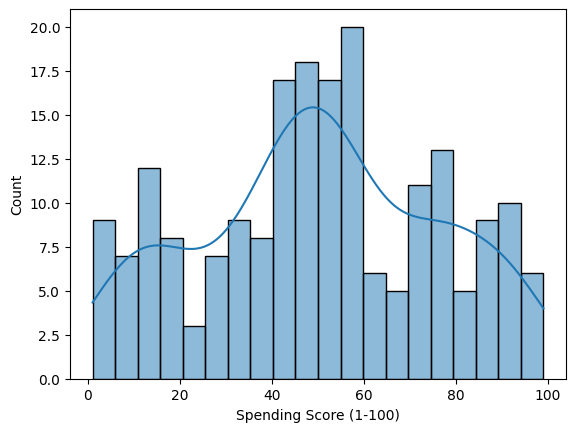

In [12]:
# Spending Score distribution
sns.histplot(data['Spending Score (1-100)'],bins=20, kde=True)
plt.show()

About histplot! the Spending Score distribution. show Spending Scores are across the full range 0-100. There's noticeable concentration aroung 40-60(average spenders). But there are also many low spenders(0-20) and high spenders(80-100). It means the dataset has natural variation in spending behavior

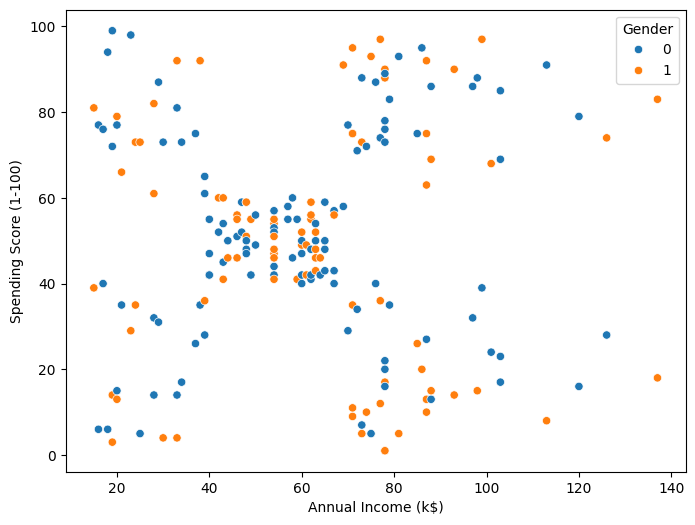

In [13]:
# Income vs Spending Score (scatter plot) to see clusters like:
# Low Income/Low Spending, Low Income/High Spending, High Income/Low Spending
# High Income/High Spending
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    hue="Gender", 
    data=data)
plt.show()

About scatterplot the annual income vs spending score show's that:
On the left side(low income) some people have low spending scores ->"Low Income
Low Spenders". Others have high spending scores ->"Low Income, High Spenders"
On the middle(medium income ~60) many points are clustered around spending score 40-60 ->"Average Customers" On the right side(high income) some are high income but low spending ->"High Income, Low Spenders" Others are high income, 
high spending ->"High Value Customers"

In [14]:
# encoding categorical
numerical = data[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
categorical = data[["Gender"]]

encoder = OneHotEncoder(sparse_output=False)
encoder_cat = encoder.fit_transform(categorical)
encoder_cat_df = pd.DataFrame(encoder_cat, columns=encoder.get_feature_names_out(categorical.columns))


## NEXT: 
# Feature Scaling: Need to scale features so that "Annual Income" (up to ~140)
# doesn't dominate "Spending Score"(0-100)



In [15]:
# Scalling the numerical feature
scaler = StandardScaler()
scaled_num = scaler.fit_transform(numerical)
scaled_num_df = pd.DataFrame(
    scaled_num,
    columns=numerical.columns
)

# Combine encoded categorical with scaled numerical faetures
final_df = pd.concat([scaled_num_df, encoder_cat_df], axis=1)

In [16]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(final_df)

# Adding cluster labels to the dataframe
final_df['cluster'] = labels

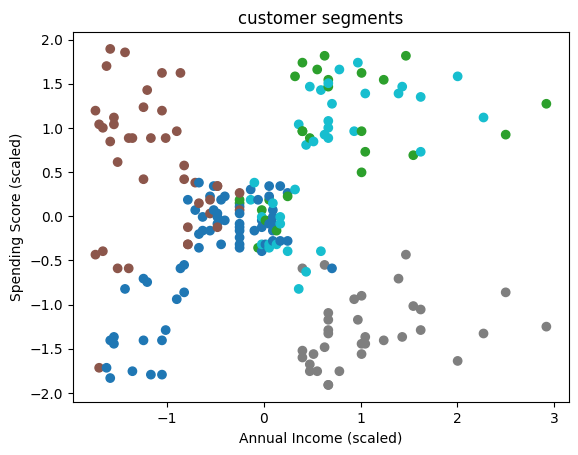

In [17]:

plt.scatter(final_df['Annual Income (k$)'], final_df['Spending Score (1-100)'], c=final_df['cluster'], cmap='tab10')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('customer segments')
plt.show()

c:\Users\alexq\Desktop\-Kuki-Qyps-\practis\my_ds_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


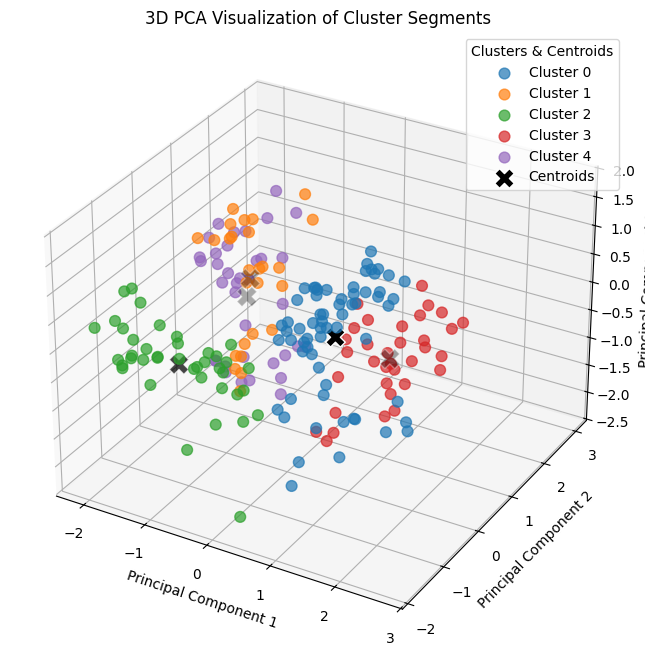

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Drop cluster column before PCA
x = final_df.drop('cluster', axis=1)

pca = PCA(n_components=3)
x_pca = pca.fit_transform(x)

# Compute cluster centroids in original space & transform into PCA space
centroids = final_df.groupby('cluster').mean().values
centroids_pca = pca.transform(centroids)

# Create PCA dataframe
pca_df = pd.DataFrame(x_pca, columns=['pca_1', 'pca_2', 'pca_3'])
pca_df['cluster'] = labels

# 3D visualization 
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# --- Plot each cluster separately ---
for cluster_id in np.unique(labels):
    cluster_points = pca_df[pca_df['cluster'] == cluster_id]
    ax.scatter(
        cluster_points['pca_1'], cluster_points['pca_2'], cluster_points['pca_3'],
        label=f'Cluster {cluster_id}', s=60, alpha=0.7
    )

# --- Plot centroids ---
ax.scatter(
    centroids_pca[:,0], centroids_pca[:,1], centroids_pca[:,2],
    c='black', marker='X', s=200, edgecolor='white', label='Centroids'
)

# Label axes
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D PCA Visualization of Cluster Segments')

# --- Clean legend ---
ax.legend(title='Clusters & Centroids')
plt.show()


## Explaniation
Each row has values centered around 0 with standard deviation 1.
Nagative values=Below average, Positive values=Above average


## Next: Finding Optimal Number of Clusters (K)
In this cases I'll used two methods
1.Elbow Method, 2.Silhouette Score(validation metric)

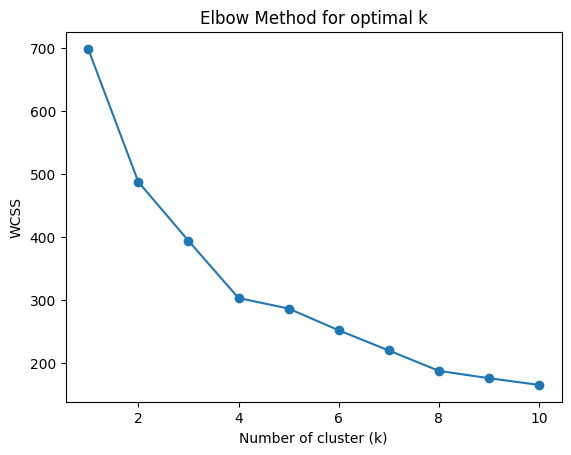

In [ ]:
# Ploting Elbow Method! Within-Cluster-Sum-of-Squares(WCSS) for different values of k.
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(K, wcss, marker='o')
plt.title("Elbow Method for optimal k")
plt.xlabel("Number of cluster (k)")
plt.ylabel("WCSS")
plt.show()


## Elbow Method (WCSS)
The elbow appears around k = 4 or 5, since after that, the drop in WCSS slows down.
This suggests that 4–5 clusters capture most of the variance.

In [30]:
# Silhouette Score(validation metric) Plateau in Silhouette Scores 
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    labels_k = kmeans.fit_predict(x)
    score = silhouette_score(x, labels_k)
    print(f"K={k}, silhouette score={score:.3f}")

K=2, silhouette score=0.282
K=3, silhouette score=0.286
K=4, silhouette score=0.318
K=5, silhouette score=0.280
K=6, silhouette score=0.274
K=7, silhouette score=0.291
K=8, silhouette score=0.334
K=9, silhouette score=0.324
K=10, silhouette score=0.306


## Silhouette Score
Max value: k = 8 (0.334), but it’s not very strong.
Silhouette suggests that clustering quality is only moderate across all k.
Generally, 0.3–0.5 = fair structure.

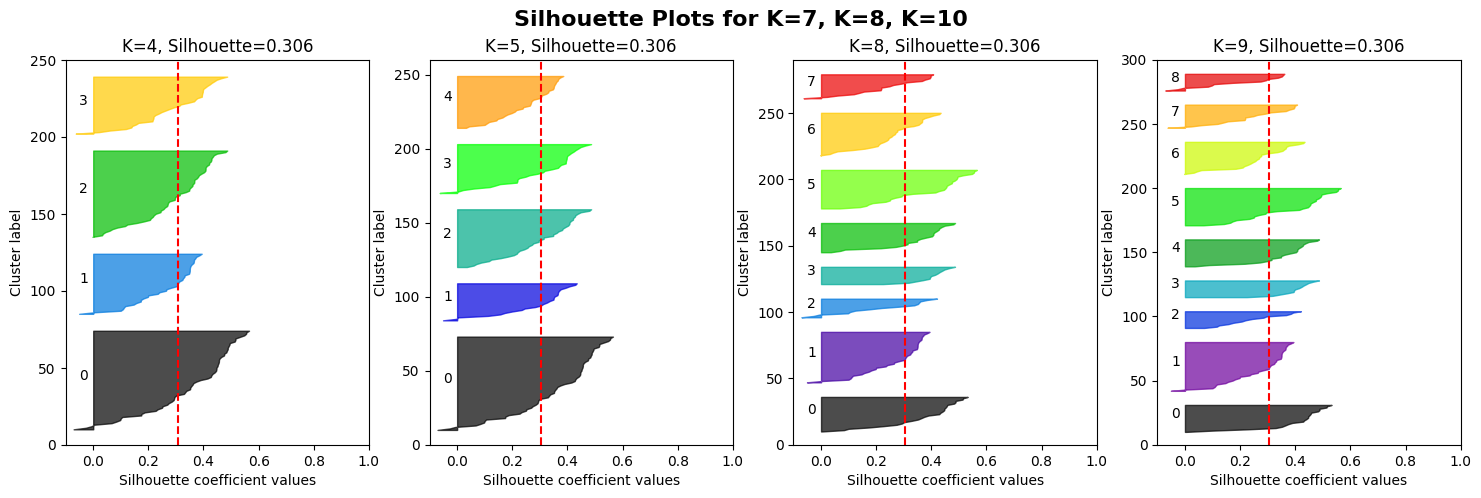

In [37]:
# Comparing K=7, K=8, and K=10 which k number is better 

ks = [4, 5, 8, 9]  

fig, axes = plt.subplots(1, 4, figsize=(18, 5)) 

for i, k in enumerate(ks): 
    #Fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)  
    labels = kmeans.fit_predict(x)  

    #Silhouette score
    score = silhouette_score(x, labels_k)  
    # compute silhouette value
    sample_silhouette_values = silhouette_samples(x, labels_k) 
    y_lower = 10  
    axes[i].set_xlim([-0.1, 1])
    axes[i].set_ylim([0, len(x) + (k + 1)* 10])

    for cluster in range(k):
        cluster_silhouette_values = sample_silhouette_values[labels == cluster]
        cluster_silhouette_values.sort()

        size_cluster = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster

        color = plt.cm.nipy_spectral(float(cluster)/k)
        axes[i].fill_betweenx(np.arange(y_lower, y_upper),
                              0, cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
        
        axes[i].text(-0.05, y_lower + 0.5 * size_cluster, str(cluster))
        y_lower = y_upper + 10  # gap between clusters

    axes[i].axvline(x=score, color='red', linestyle='--')
    axes[i].set_title(f"K={k}, Silhouette={score:.3f}")
    axes[i].set_xlabel("Silhouette coefficient values")
    axes[i].set_ylabel("Cluster label")

plt.suptitle("Silhouette Plots for K=7, K=8, K=10", fontsize=16, fontweight="bold")
plt.show()


## Silhouette Score
Max value: k = 8 (0.334), but it’s not very strong.
Silhouette suggests that clustering quality is only moderate across all k.
Generally, 0.3–0.5 = fair structure.

In [38]:
# Using Davies-Bouldin Score(DB Index)
db_score = davies_bouldin_score(x, labels_k)
print("Davies-Bouldin Score:", db_score)

Davies-Bouldin Score: 1.2178524744262118


## Davies-Bouldin Score (DBI = 1.21)
Lower is better. A DBI close to 1 means clusters are fairly compact and separated, but not great.
DBI here agrees with Silhouette that clusters exist but overlap.

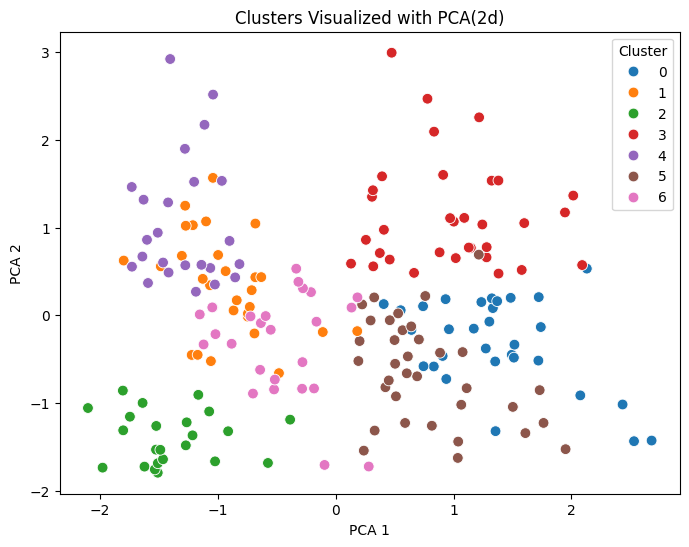

In [39]:
# Fit PCA to reduce to 2d
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

# runing kmeans again for chosen k
kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(x)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=labels, palette='tab10', s=60)
plt.title("Clusters Visualized with PCA(2d)")
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()


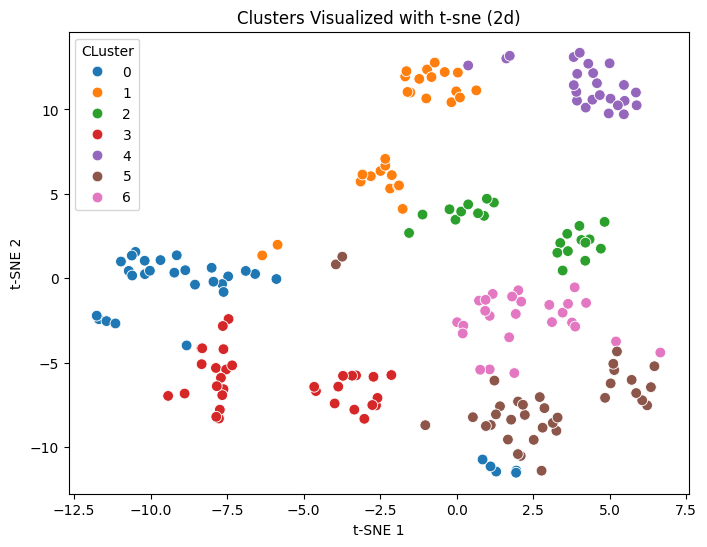

In [51]:
# T-SNE Visualization
from sklearn.manifold import TSNE 

tsne = TSNE(n_components=2, random_state=0, perplexity=30, max_iter=1000)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_tsne[:,0], y=x_tsne[:,1], hue=labels, palette='tab10', s=60)
plt.title('Clusters Visualized with t-sne (2d)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='CLuster')
plt.show()

In [ ]:
cluster_profile = final_df.groupby('cluster').mean()
cluster_counts = final_df['cluster'].value_counts().sort_index()
print(cluster_profile)

print(final_df['cluster'].value_counts())

              Age  Annual Income (k$)  Spending Score (1-100)  Gender_0  \
cluster                                                                   
0        1.080537           -0.504457               -0.379602  0.578125   
1       -0.588211            0.696504                0.882145  0.000000   
2       -0.927584           -1.121609                0.561942  0.625000   
3        0.173295            1.066454               -1.298010  0.411765   
4       -0.629155            0.632807                0.639262  1.000000   

         Gender_1  
cluster            
0        0.421875  
1        1.000000  
2        0.375000  
3        0.588235  
4        0.000000  
cluster
0    64
2    40
4    36
3    34
1    26
Name: count, dtype: int64


The features are scaled (standardized), so the values (like -0.5, 1.08, etc.) are z-scores, not raw units.
Positive = above average of the dataset
Negative = below average of the dataset


## Interpretation of Clusters:
-> Cluster 0 (64 customers, largest group)
Age = +1.08 → Older than average. Income = -0.50 → Lower than average income
Spending Score = -0.38 → Spend less than average Gender_0=0.58, Gender_1=0.42 → Mixed, but slightly more Gender_0
Likely older, low-income, low-spending customers (possibly conservative shoppers).

Cluster 1 (26 customers, smallest group) Age = -0.58 → Younger than average
Income = +0.69 → Higher than average income Spending Score = +0.88 → Very high spenders Gender_1=1.0 → All Gender_1

Young, wealthy, high-spending females → very profitable cluster.
Cluster 2 (40 customers) Age = -0.93 → Youngest group Income = -1.12 → Low income Spending Score = +0.56 → Still high spenders
Gender_0=0.62, Gender_1=0.38 → Slightly more Gender_0
Young, low-income but high-spending customers → impulsive spenders.
Cluster 3 (34 customers) Age = +0.17 → Around average age
Income = +1.06 → High income Spending Score = -1.29 → Very low spenders
Gender mix ~40/60 High-income, low-spending customers → maybe “savers” or “luxury window-shoppers.”
Cluster 4 (36 customers) Age = -0.63 → Young Income = +0.63 → Above average income Spending Score = +0.64 → Spend a lot
Gender_0=1.0 → All Gender_0 Young, wealthy, high-spending males → another highly profitable cluster. 3.Business Meaning (Segment Labels)
Cluster 0 → Conservative Seniors (low income, low spend)
Cluster 1 → Wealthy Young Females (Premium Shoppers)
Cluster 2 → Young Impulsive Spenders (low income, high spend)
Cluster 3 → Affluent Low-Spenders (Luxury Window Shoppers)
Cluster 4 → Wealthy Young Males (Premium Shoppers)

Now i have 5 clear customer personas based on demographics + spending behavior.

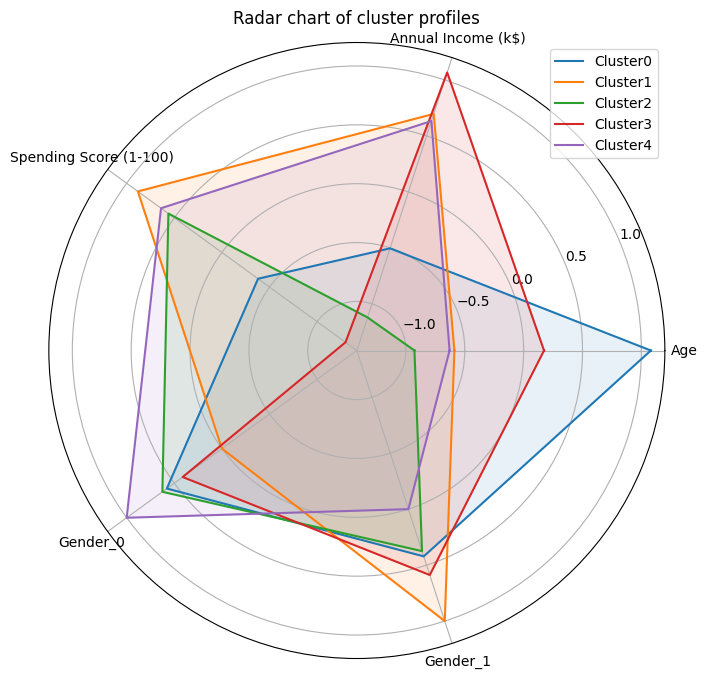

In [46]:
#Cluster Profiling Visualization: Radar / Spider Chart (Cluster Means)
# to see how each cluster compares across all features:

#feature
features = cluster_profile.columns
N = len(features)

# angel for each axis
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

#radar chart
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

for i, row in cluster_profile.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster{i}')
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features, fontsize=10)

plt.title('Radar chart of cluster profiles')
plt.legend(loc='upper right')
plt.show()


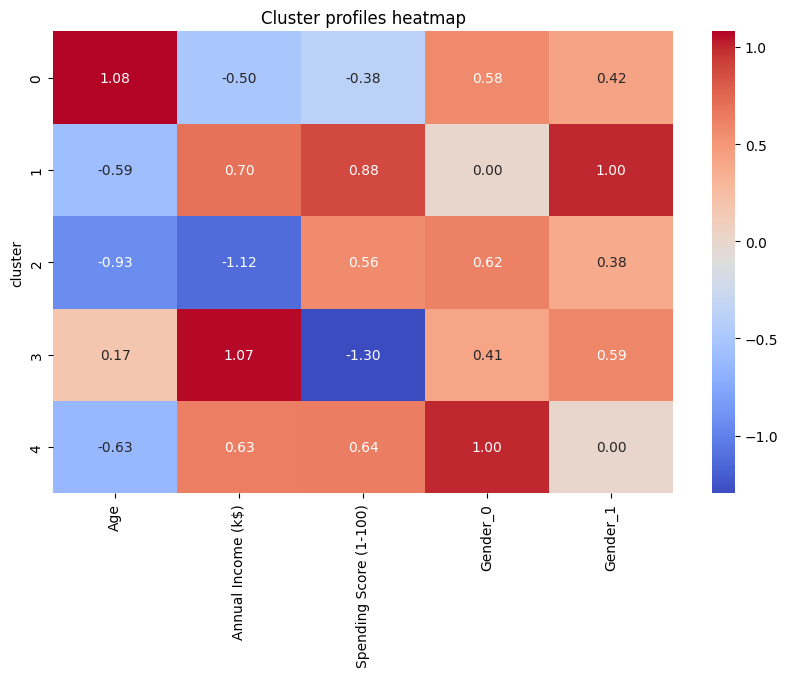

In [47]:
#Heatmap of Cluster Means
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster profiles heatmap')
plt.show()

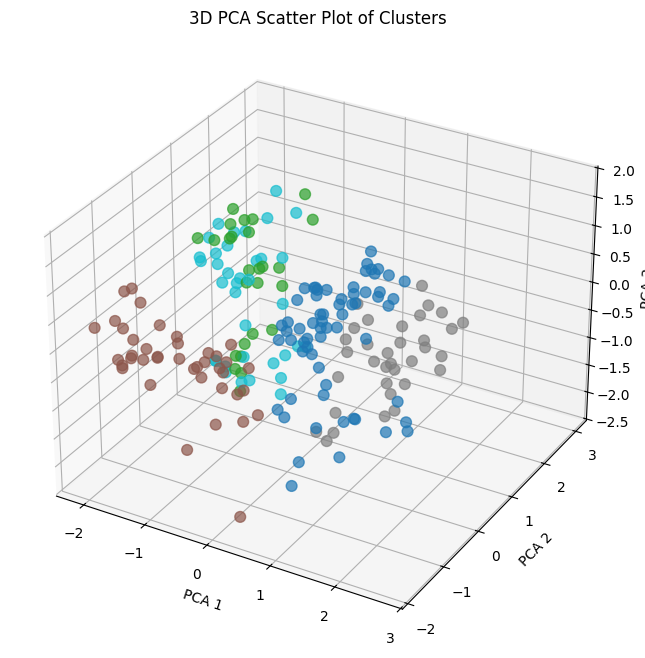

In [48]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(final_df.drop('cluster', axis=1))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:,0], pca_result[:,1], pca_result[:,2],
           c=final_df['cluster'], cmap='tab10', s=60, alpha=0.7)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.title('3D PCA Scatter Plot of Clusters')
plt.show()


Age  Annual Income (k$)  Spending Score (1-100)  Gender_0  \
cluster                                                                   
0        1.080537           -0.504457               -0.379602  0.578125   
1       -0.588211            0.696504                0.882145  0.000000   
2       -0.927584           -1.121609                0.561942  0.625000   
3        0.173295            1.066454               -1.298010  0.411765   
4       -0.629155            0.632807                0.639262  1.000000   

         Gender_1  
cluster            
0        0.421875  
1        1.000000  
2        0.375000  
3        0.588235  
4        0.000000  
cluster
0    64
2    40
4    36
3    34
1    26
1.These are standardized values(z-scores), so positive = above average, negative=below average

2. Interpret Each Cluster
Cluster 0 – Mid-age Balanced Shoppers (64 customers)
Age: slightly older than average
Income: slightly below average
Spending: slightly below average
Gender mix: balanced
Not extreme in any feature → middle-class, stable customers.
Strategy: Retain with loyalty points, general discounts.

Cluster 1 – Young High-Income Women (26 customers)
         Age: younger than average
Income: high
Spending: very high
Gender: 100% female
Premium, high-value female segment.
Strategy: Exclusive offers, luxury/premium products, VIP loyalty programs.

Cluster 2 – Young Low-Income Men (40 customers)
         Age: very young
Income: very low
Spending: moderately high (they still spend despite low income!)
Gender: mostly male
Budget-conscious but aspirational shoppers.
Strategy: Target with discounts, entry-level products, buy-now-pay-later schemes.

Cluster 3 – High-Income Mature Women (34 customers)
            Age: slightly older
Income: very high
Spending: very low
Gender: majority women
Wealthy but cautious customers.
Strategy: Personalized outreach, emphasize trust, quality, exclusivity to convert them.

Cluster 4 – Young Middle-Income Men (36 customers)
           Age: younger than average
Income: moderately high
Spending: moderately high
Gender: 100% male
Upcoming earners with good spending habits.
Strategy: Cross-sell, tech products, lifestyle branding.

## Step 3: Naming Personas
It can name them in a marketing-friendly way:

Cluster 0 → "Steady Middle Class"
Cluster 1 → "Premium Young Women"
Cluster 2 → "Aspirational Young Men"
Cluster 3 → "Wealthy but Reserved Women"
Cluster 4 → "Emerging Spenders (Young Men)"

Step 4: Business Applications
Targeted Marketing Campaigns – run gender & income-specific campaigns.
Loyalty Programs – for Cluster 0 (steady customers) and Cluster 4 (emerging).
Premium Offers – for Cluster 1 (high-value women).
Discounts & Entry-level Products – for Cluster 2 (aspirational young men).
Personalized Engagement – for Cluster 3 (wealthy but low-spend).

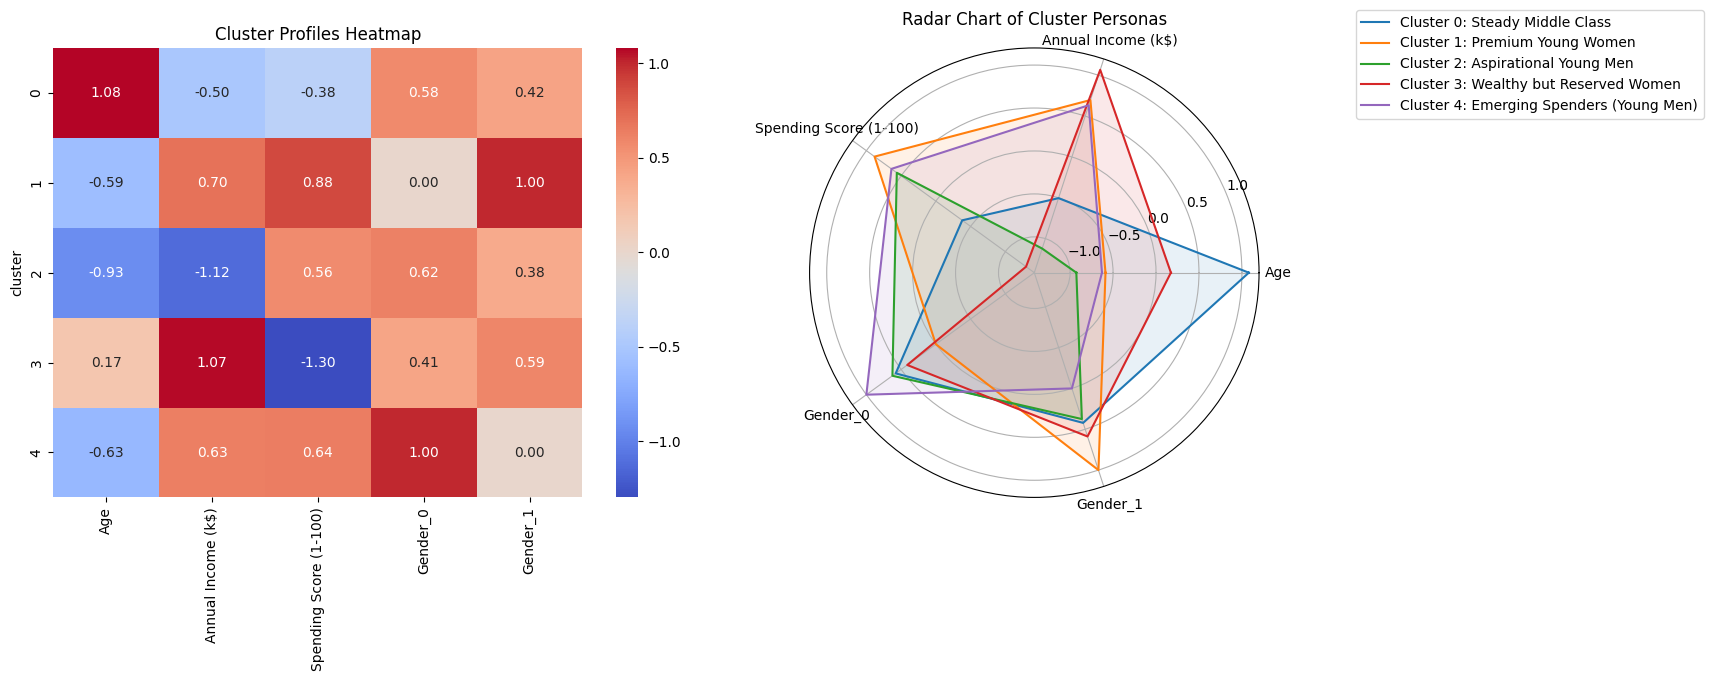


Cluster Summary:

   Cluster                        Persona  Count
0        0            Steady Middle Class     64
1        1            Premium Young Women     26
2        2         Aspirational Young Men     40
3        3     Wealthy but Reserved Women     34
4        4  Emerging Spenders (Young Men)     36


In [ ]:
# Final Dashboard Code
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cluster profiles and counts
cluster_profile = final_df.groupby('cluster').mean()
cluster_counts = final_df['cluster'].value_counts().sort_index()

# Persona Names
persona_names = {
    0: "Steady Middle Class",
    1: "Premium Young Women",
    2: "Aspirational Young Men",
    3: "Wealthy but Reserved Women",
    4: "Emerging Spenders (Young Men)"}

# --- Create figure with Heatmap + Radar ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7),
                               subplot_kw={})  # no polar yet for ax1

# Heatmap (normal cartesian subplot)
sns.heatmap(cluster_profile, annot=True, cmap='coolwarm', fmt='.2f', ax=ax1)
ax1.set_title("Cluster Profiles Heatmap")

# Radar Chart (polar subplot)
# replace ax2 with a polar axes
ax2.remove()  # remove placeholder
ax2 = fig.add_subplot(122, polar=True)

features = cluster_profile.columns
N = len(features)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
angles += angles[:1]

for i, row in cluster_profile.iterrows():
    values = row.tolist()
    values += values[:1]
    ax2.plot(angles, values, label=f"Cluster {i}: {persona_names[i]}")
    ax2.fill(angles, values, alpha=0.1)

ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(features, fontsize=10)
ax2.set_title('Radar Chart of Cluster Personas')
ax2.legend(loc='upper left', bbox_to_anchor=(1.2, 1.1))

plt.tight_layout()
plt.show()

# --- Summary Table ---
summary = pd.DataFrame({
    "Cluster": cluster_profile.index,
    "Persona": [persona_names[c] for c in cluster_profile.index],
    "Count": [cluster_counts[c] for c in cluster_profile.index]
})

print("\nCluster Summary:\n")
print(summary)
